In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Minor/Minor project datasets/Main_dataset/air_quality_data-4.csv")

In [3]:
df_main=df[["datetime","pm10","pm25","co","no2","o3","so2","aqi"]]

In [4]:
df_main

,datetime,pm10,pm25,co,no2,o3,so2,aqi
0,2023-01-30:18,57.0,42.75,198.0,5.0,87.0,20.0,153
1,2023-01-30:17,54.3,40.75,192.3,5.0,89.0,18.0,153
2,2023-01-30:16,51.7,38.75,186.7,5.0,91.0,16.0,153
3,2023-01-30:15,49.0,36.75,181.0,5.0,93.0,14.0,150
4,2023-01-30:14,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...,...
5427,2023-08-05:22,15.0,12.00,89.0,7.7,37.3,17.7,50
5428,2023-08-05:21,16.0,12.00,92.0,8.0,39.0,18.0,87
5429,2023-08-05:20,18.0,13.50,100.3,9.0,39.0,18.3,104
5430,2023-08-05:19,20.0,15.00,108.7,10.0,39.0,18.7,80


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  5432 non-null   object 
 1   pm10      5432 non-null   float64
 2   pm25      5432 non-null   float64
 3   co        5432 non-null   float64
 4   no2       5432 non-null   float64
 5   o3        5432 non-null   float64
 6   so2       5432 non-null   float64
 7   aqi       5432 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 339.6+ KB


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

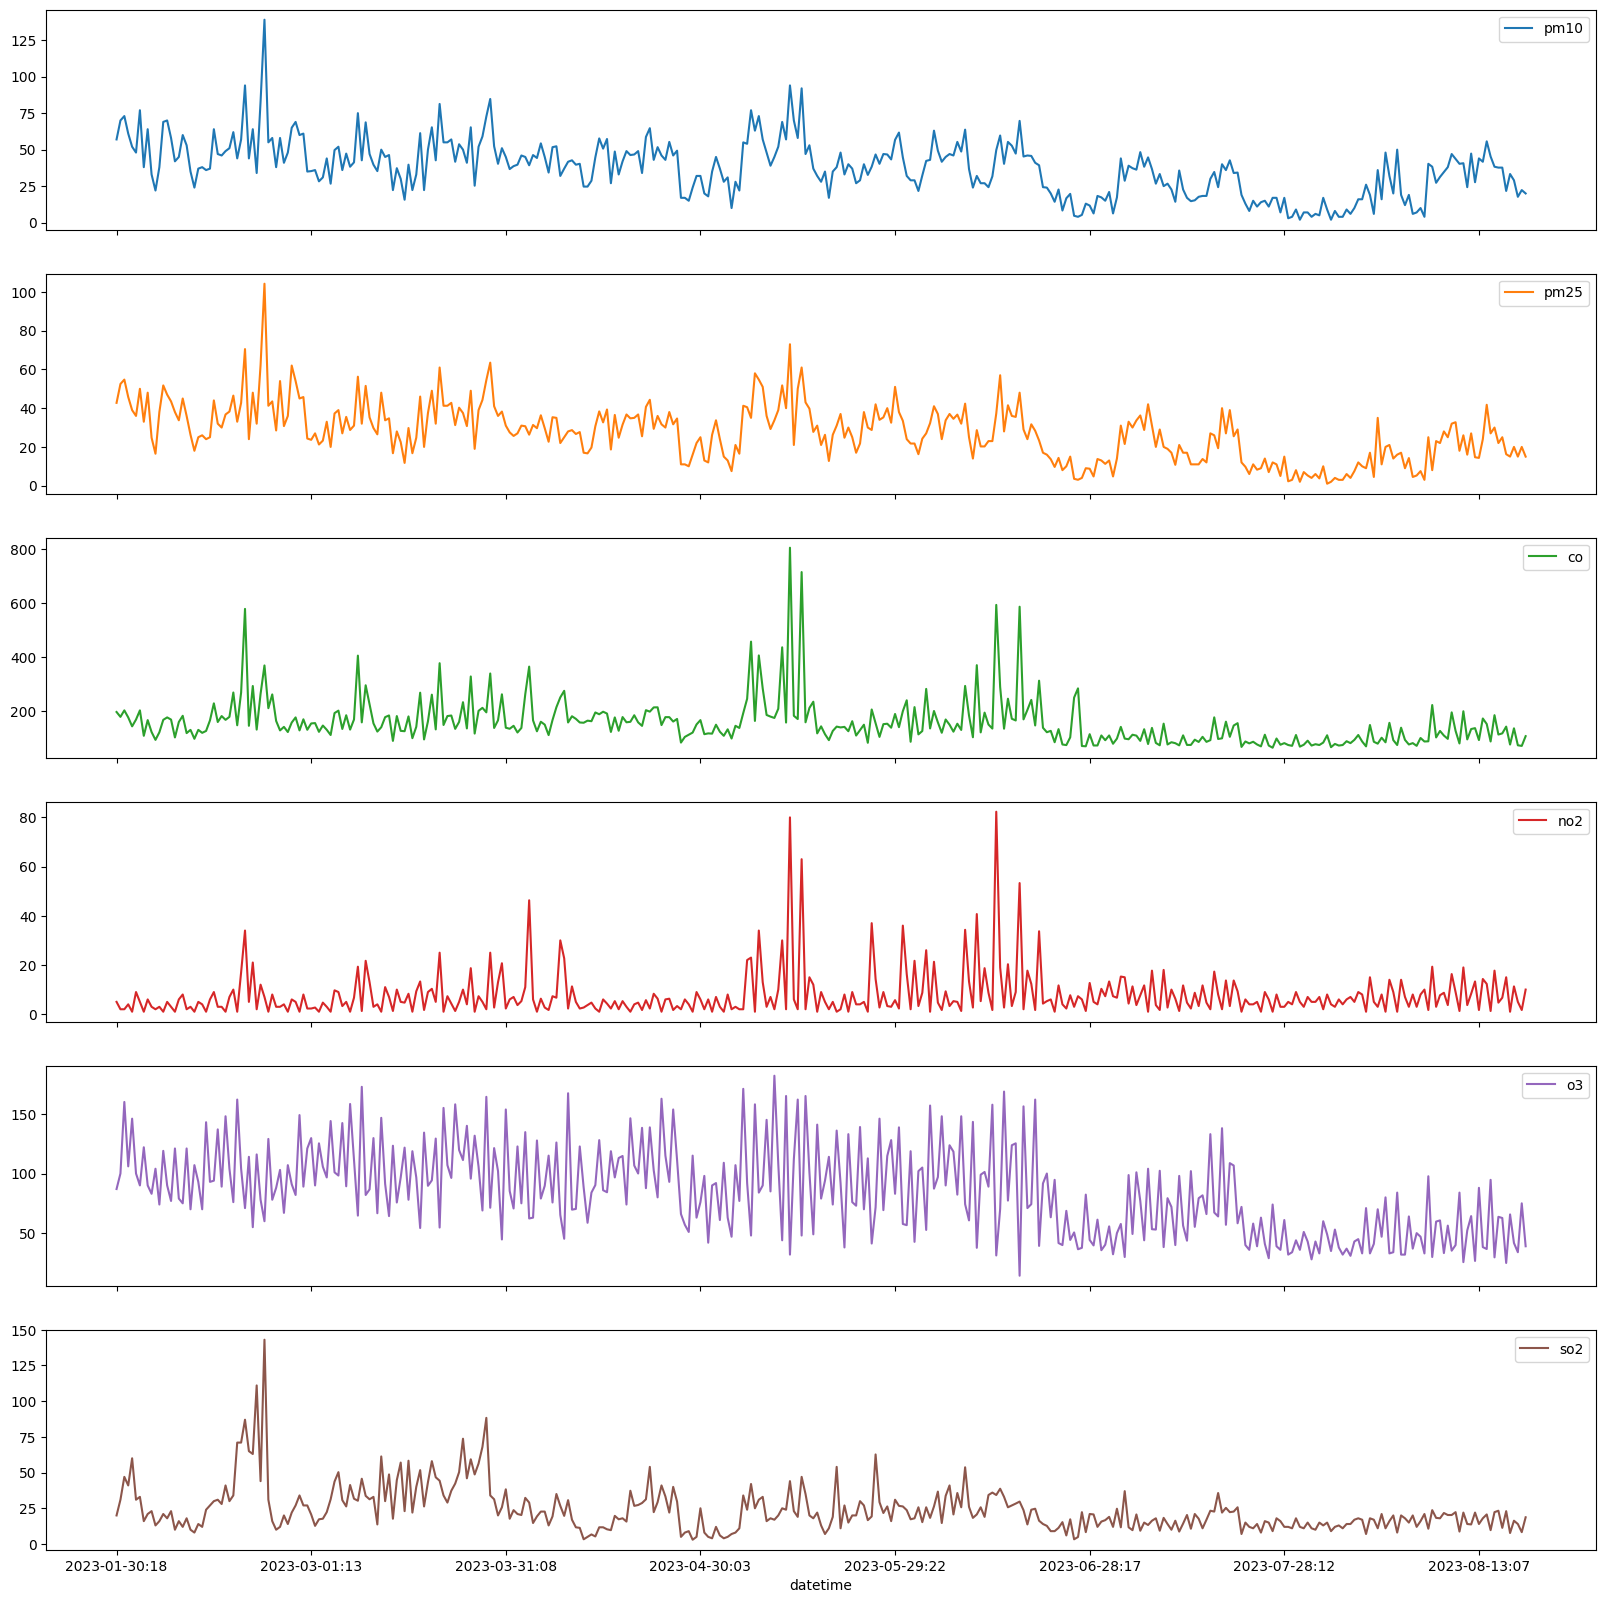

In [6]:
df_main .set_index('datetime')[['pm10', 'pm25', 'co', 'no2', 'o3','so2']][::15].plot (subplots=True, figsize=(20, 20),kind='line')

In [7]:
new = df_main["datetime"].str.split(":", n=1, expand=True)
df_main["date"] = new[0]
df_main["time"] = new[1]

# Combine "date" and "time" into a new "datetime" column
df_main['datetime'] = df_main.date + " " + df_main.time

# Drop "date" and "time" columns
df_main = df_main.drop(['date', 'time'], axis=1)  # Specify the 'axis' parameter


<ipython-input-7-1be7e3b8ebe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["date"] = new[0]
<ipython-input-7-1be7e3b8ebe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["time"] = new[1]
<ipython-input-7-1be7e3b8ebe9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [8]:
df_main

,datetime,pm10,pm25,co,no2,o3,so2,aqi
0,2023-01-30 18,57.0,42.75,198.0,5.0,87.0,20.0,153
1,2023-01-30 17,54.3,40.75,192.3,5.0,89.0,18.0,153
2,2023-01-30 16,51.7,38.75,186.7,5.0,91.0,16.0,153
3,2023-01-30 15,49.0,36.75,181.0,5.0,93.0,14.0,150
4,2023-01-30 14,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...,...
5427,2023-08-05 22,15.0,12.00,89.0,7.7,37.3,17.7,50
5428,2023-08-05 21,16.0,12.00,92.0,8.0,39.0,18.0,87
5429,2023-08-05 20,18.0,13.50,100.3,9.0,39.0,18.3,104
5430,2023-08-05 19,20.0,15.00,108.7,10.0,39.0,18.7,80


In [9]:
df_main.datetime = pd.to_datetime(df_main.datetime)

In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5432 non-null   datetime64[ns]
 1   pm10      5432 non-null   float64       
 2   pm25      5432 non-null   float64       
 3   co        5432 non-null   float64       
 4   no2       5432 non-null   float64       
 5   o3        5432 non-null   float64       
 6   so2       5432 non-null   float64       
 7   aqi       5432 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 339.6 KB


In [11]:
df_main = df_main.set_index('datetime')

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5432 entries, 2023-01-30 18:00:00 to 2023-08-05 18:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    5432 non-null   float64
 1   pm25    5432 non-null   float64
 2   co      5432 non-null   float64
 3   no2     5432 non-null   float64
 4   o3      5432 non-null   float64
 5   so2     5432 non-null   float64
 6   aqi     5432 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 339.5 KB


In [13]:
df_main = df_main.interpolate()

In [14]:
df_main

,pm10,pm25,co,no2,o3,so2,aqi
datetime,,,,,,,
2023-01-30 18:00:00,57.0,42.75,198.0,5.0,87.0,20.0,153
2023-01-30 17:00:00,54.3,40.75,192.3,5.0,89.0,18.0,153
2023-01-30 16:00:00,51.7,38.75,186.7,5.0,91.0,16.0,153
2023-01-30 15:00:00,49.0,36.75,181.0,5.0,93.0,14.0,150
2023-01-30 14:00:00,46.3,34.75,172.7,3.7,99.3,12.3,137
...,...,...,...,...,...,...,...
2023-08-05 22:00:00,15.0,12.00,89.0,7.7,37.3,17.7,50
2023-08-05 21:00:00,16.0,12.00,92.0,8.0,39.0,18.0,87
2023-08-05 20:00:00,18.0,13.50,100.3,9.0,39.0,18.3,104


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
# Split a multivariate sequence into samples
def sequences(seq,data_in,data_out):
	A,B = list(), list()
	for i in range(len(seq)):
		# find the end of this pattern
		pattern_in = i + data_in
		pattern_out= pattern_in + data_out
		# check if we are beyond the dataset
		if pattern_out > len(seq):
			break
		# gather input and output parts of the pattern
		seq_in, seq_out = seq[i:pattern_in, :], seq[pattern_in:pattern_out, :]
		A.append(seq_in)
		B.append(seq_out)
	return array(A), array(B)

In [17]:
complete_dataset = len(df_main)

In [18]:
df_train = df_main[:int(complete_dataset*0.76)]

In [19]:
df_test = df_main[int(complete_dataset*0.76):complete_dataset]

In [20]:
normalize = MinMaxScaler()

In [21]:
df_train_normalize= normalize.fit_transform(df_train)

In [22]:
df_test_normalize = normalize.fit_transform(df_test)

In [23]:
df_train.shape

(4128, 7)

In [24]:
df_train.shape[0]/24

172.0

In [25]:
df_test.shape

(1304, 7)

In [26]:
df_test.shape[0]/24

54.333333333333336

In [27]:
data_in=6

In [28]:
data_out=3

In [29]:
x_train, y_train = sequences(df_train_normalize, data_in, data_out)

In [30]:
x_test, y_test = sequences(df_test_normalize, data_in, data_out)

In [31]:
columns= x_train.shape[2]

In [32]:
print(x_train[0])

[[0.38980617 0.33669355 0.13459621 0.04545455 0.43617021 0.0972973
  0.46779661]
 [0.37042355 0.32056452 0.12891326 0.04545455 0.44680851 0.08648649
  0.46779661]
 [0.35175879 0.30443548 0.12333001 0.04545455 0.45744681 0.07567568
  0.46779661]
 [0.33237617 0.28830645 0.11764706 0.04545455 0.46808511 0.06486486
  0.45762712]
 [0.31299354 0.27217742 0.10937188 0.03068182 0.50159574 0.05567568
  0.41355932]
 [0.29432879 0.25604839 0.10099701 0.01477273 0.5356383  0.04702703
  0.36610169]]


In [33]:

print(y_train[0])

[[0.27494616 0.23991935 0.09272183 0.         0.56914894 0.03783784
  0.38644068]
 [0.28930366 0.25201613 0.09371884 0.         0.56010638 0.03945946
  0.42033898]
 [0.30366116 0.33870968 0.09471585 0.         0.55159574 0.04162162
  0.35932203]]


In [34]:
columns

7

In [35]:
x_train.shape

(4120, 6, 7)

In [36]:
y_train.shape

(4120, 3, 7)

In [37]:
x_test.shape

(1296, 6, 7)

In [38]:
y_test.shape

(1296, 3, 7)

In [39]:
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

In [40]:
from tensorflow.keras.layers import  LSTM

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(data_in, columns), return_sequences=True))
model.add(LSTM(200, activation='relu', return_sequences=False))
model.add(RepeatVector(data_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(columns)))


In [ ]:
from tensorflow.keras import optimizers
epoch =75

model.compile(optimizer='adam', loss='mse',metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))


Epoch 1/75
129/129 [==============================] - 21s 53ms/step - loss: 0.0200 - mean_absolute_error: 0.0955 - val_loss: 0.0211 - val_mean_absolute_error: 0.1068
Epoch 2/75
129/129 [==============================] - 4s 34ms/step - loss: 0.0087 - mean_absolute_error: 0.0646 - val_loss: 0.0125 - val_mean_absolute_error: 0.0829
Epoch 3/75
129/129 [==============================] - 6s 43ms/step - loss: 0.0058 - mean_absolute_error: 0.0533 - val_loss: 0.0112 - val_mean_absolute_error: 0.0765
Epoch 4/75
129/129 [==============================] - 5s 38ms/step - loss: 0.0044 - mean_absolute_error: 0.0460 - val_loss: 0.0101 - val_mean_absolute_error: 0.0726
Epoch 5/75
129/129 [==============================] - 4s 34ms/step - loss: 0.0040 - mean_absolute_error: 0.0435 - val_loss: 0.0102 - val_mean_absolute_error: 0.0755
Epoch 6/75
129/129 [==============================] - 6s 50ms/step - loss: 0.0037 - mean_absolute_error: 0.0415 - val_loss: 0.0092 - val_mean_absolute_error: 0.0698
Epoch 7/7

In [ ]:
future = model.predict_generator(x_test)

In [ ]:
print(future.shape)


In [ ]:
future= np.reshape(future, (1296*3, 7))

In [ ]:
future = pd.DataFrame(future)

In [ ]:
future= normalize.inverse_transform(future)

In [ ]:
future = pd.DataFrame(future)

In [ ]:
future

In [ ]:
future.shape

In [ ]:
y_test.shape

In [ ]:
actual = np.reshape(y_test, (1296*3, 7))

In [ ]:
actual= pd.DataFrame(actual)

In [ ]:
actual = normalize.inverse_transform(actual)

In [ ]:
actual= pd.DataFrame(actual)

In [ ]:
actual

In [ ]:
actual.shape

In [ ]:
df_compare = pd.DataFrame()

In [ ]:
df_compare['pm10'] = actual[0]
df_compare['pm10_pred'] = future[0]
df_compare['pm25'] = actual[1]
df_compare['pm25_pred'] = future[1]
df_compare['co'] = actual[2]
df_compare['co_pred'] = future[2]
df_compare['no2'] = actual[3]
df_compare['no2_pred'] = future[3]
df_compare['o3'] = actual[4]
df_compare['o3_pred'] =future[4]
df_compare['so2'] = actual[5]
df_compare['so2_pred'] = future[5]
df_compare['aqi'] = actual[6]
df_compare['aqi_pred'] = future[6]

In [ ]:
df_compare

<Axes: >

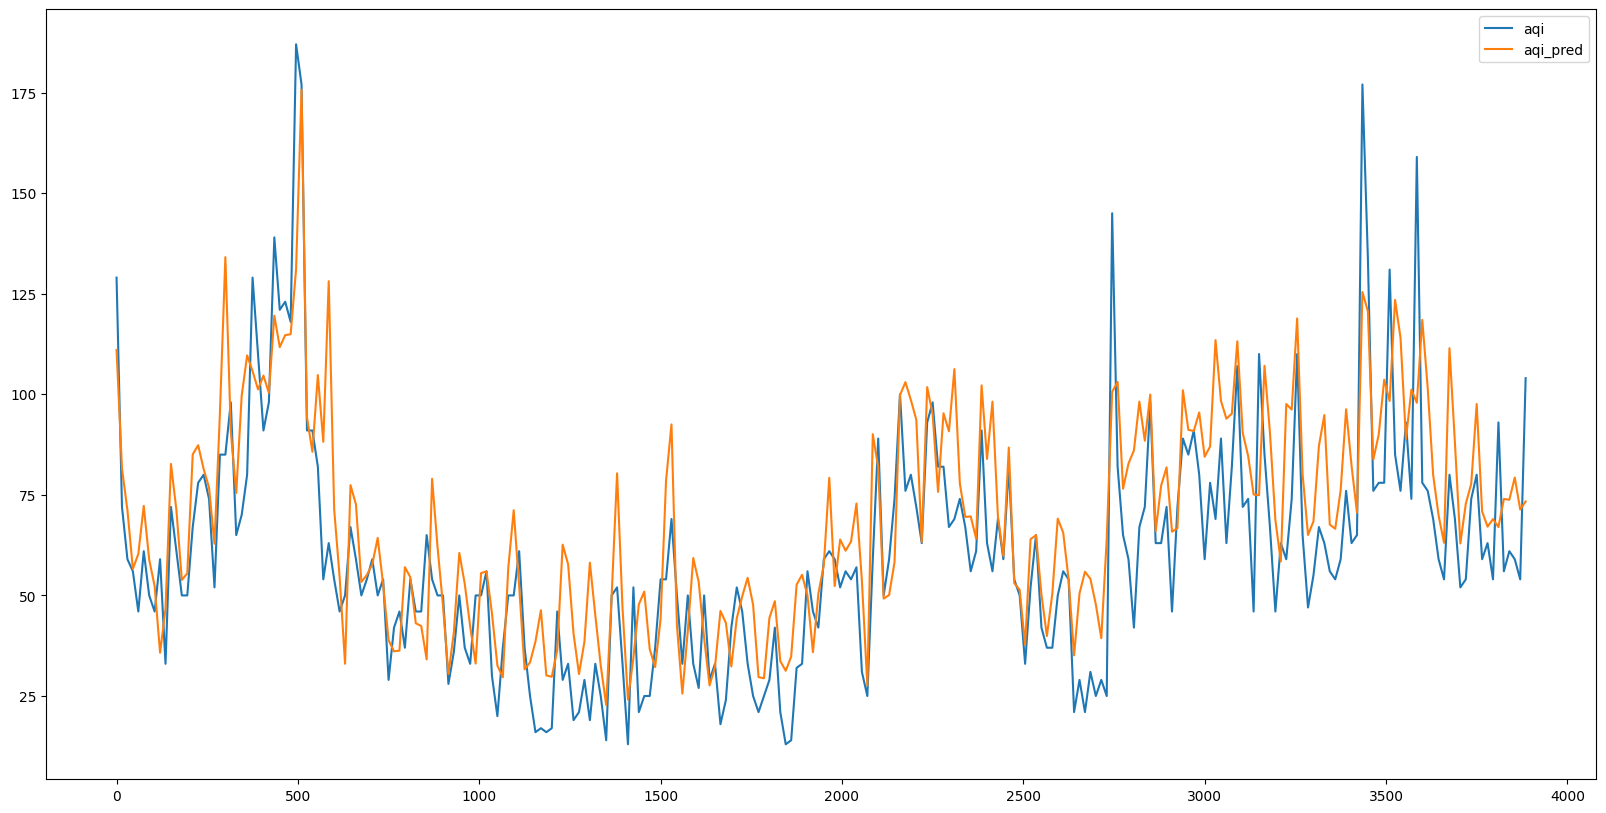

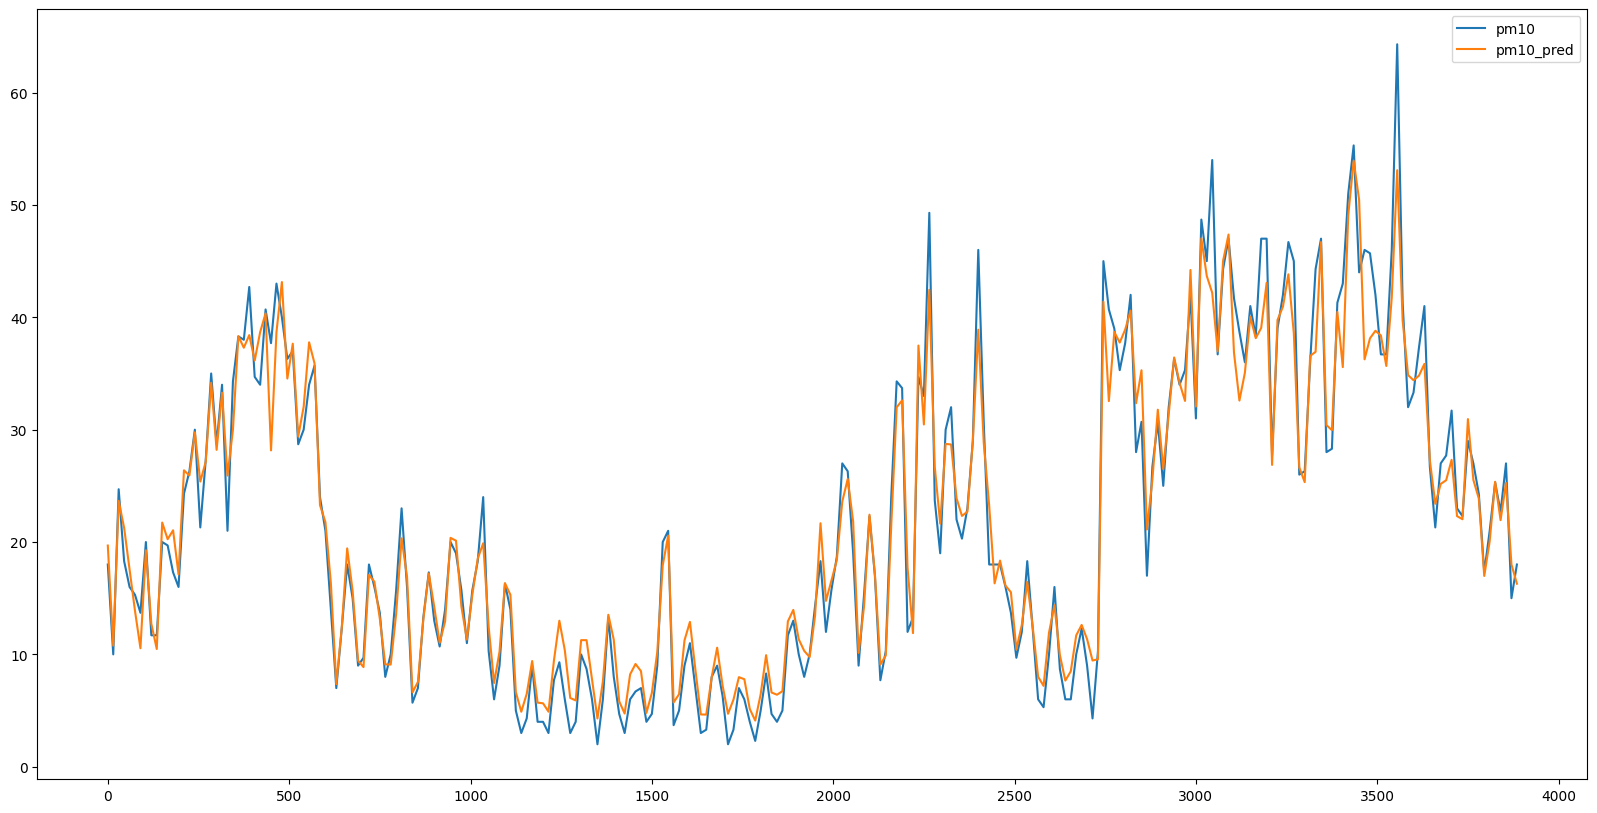

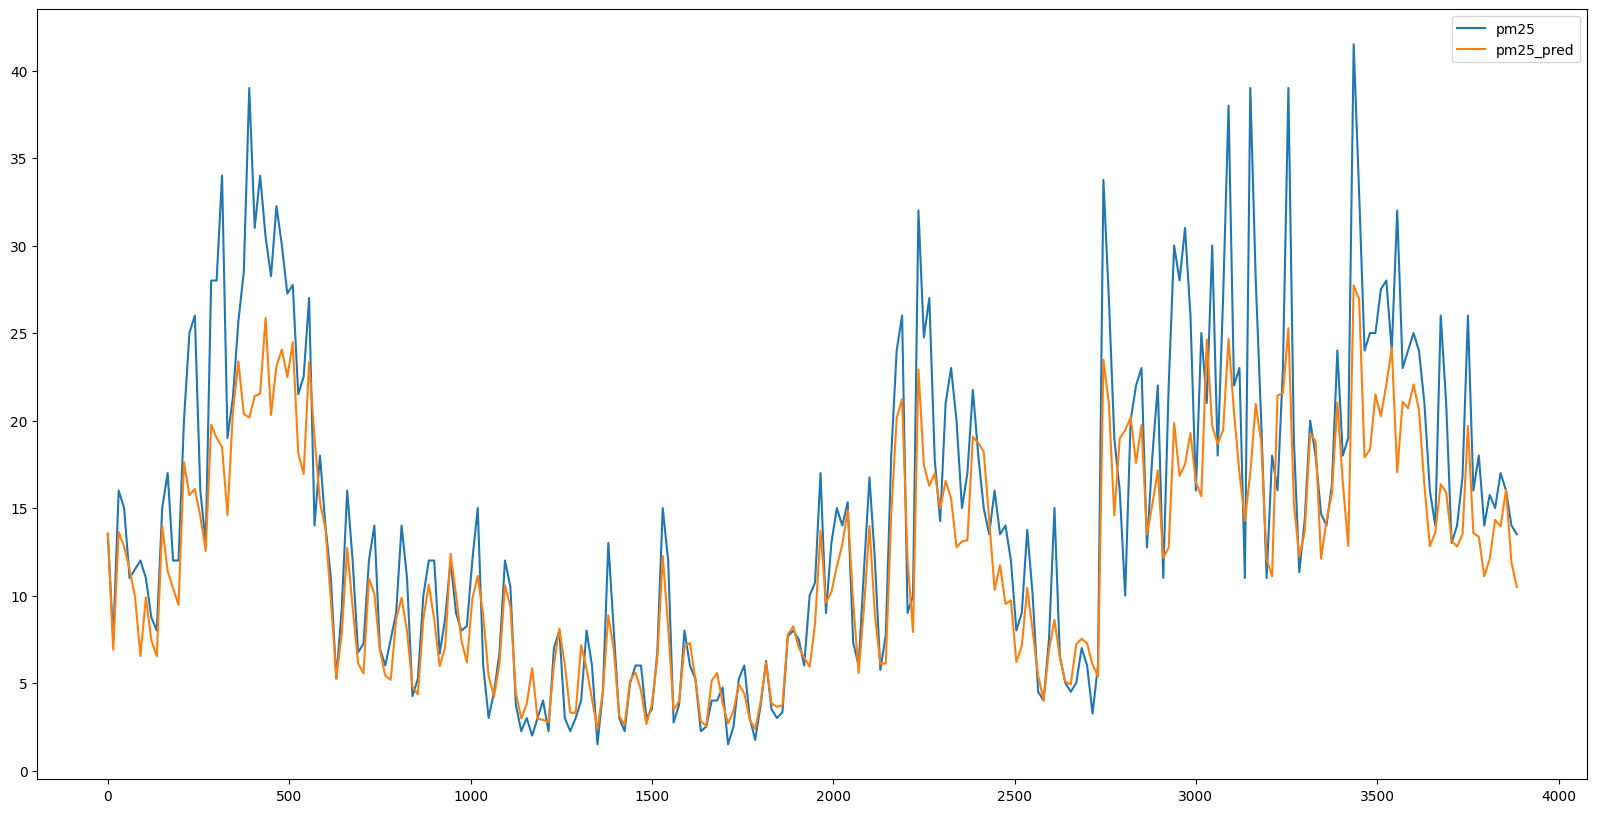

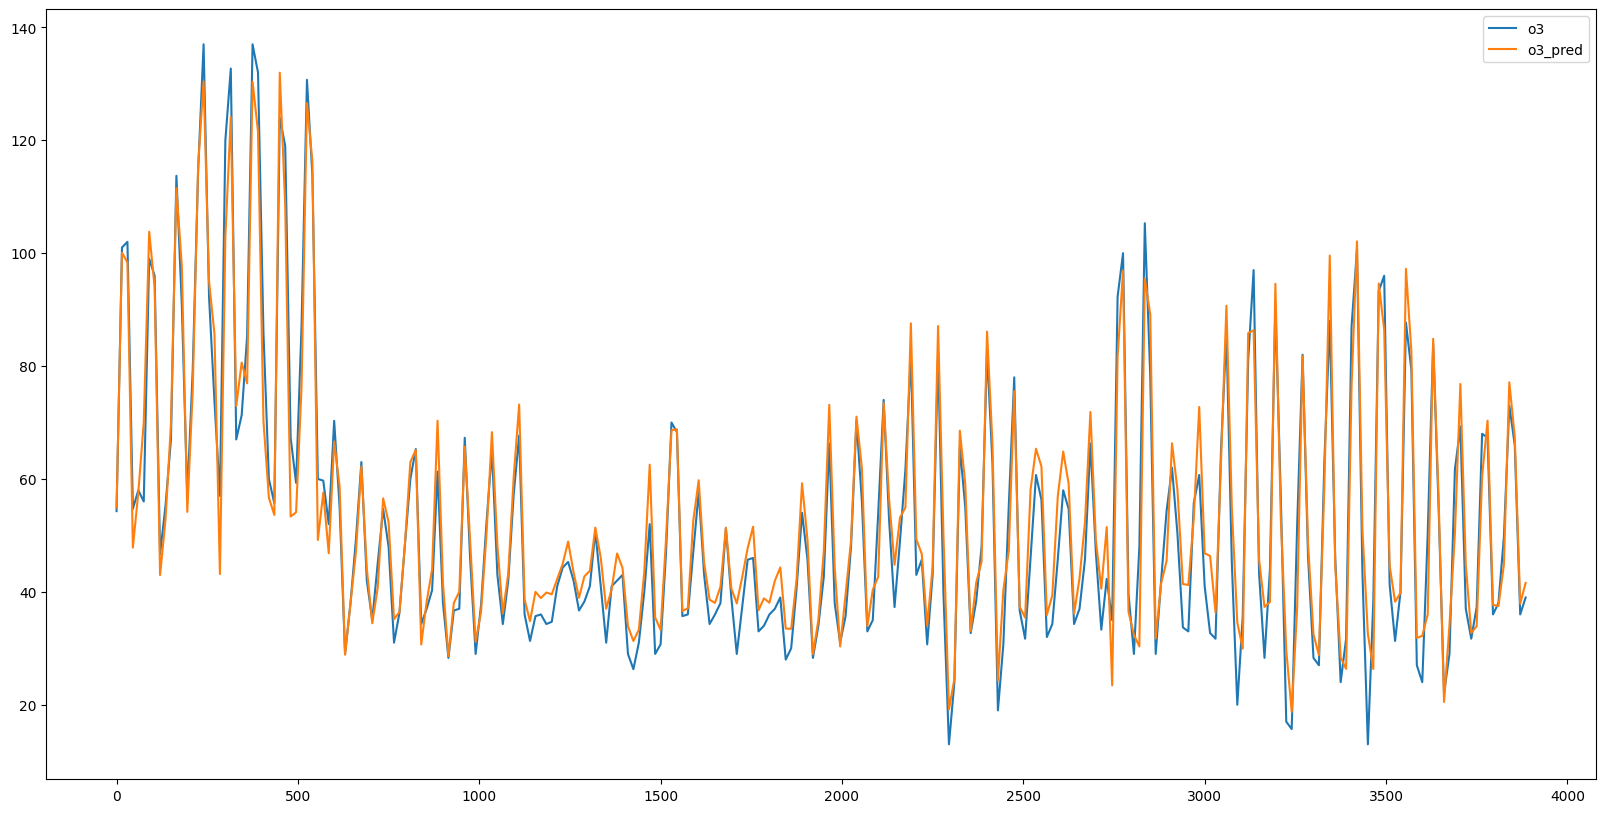

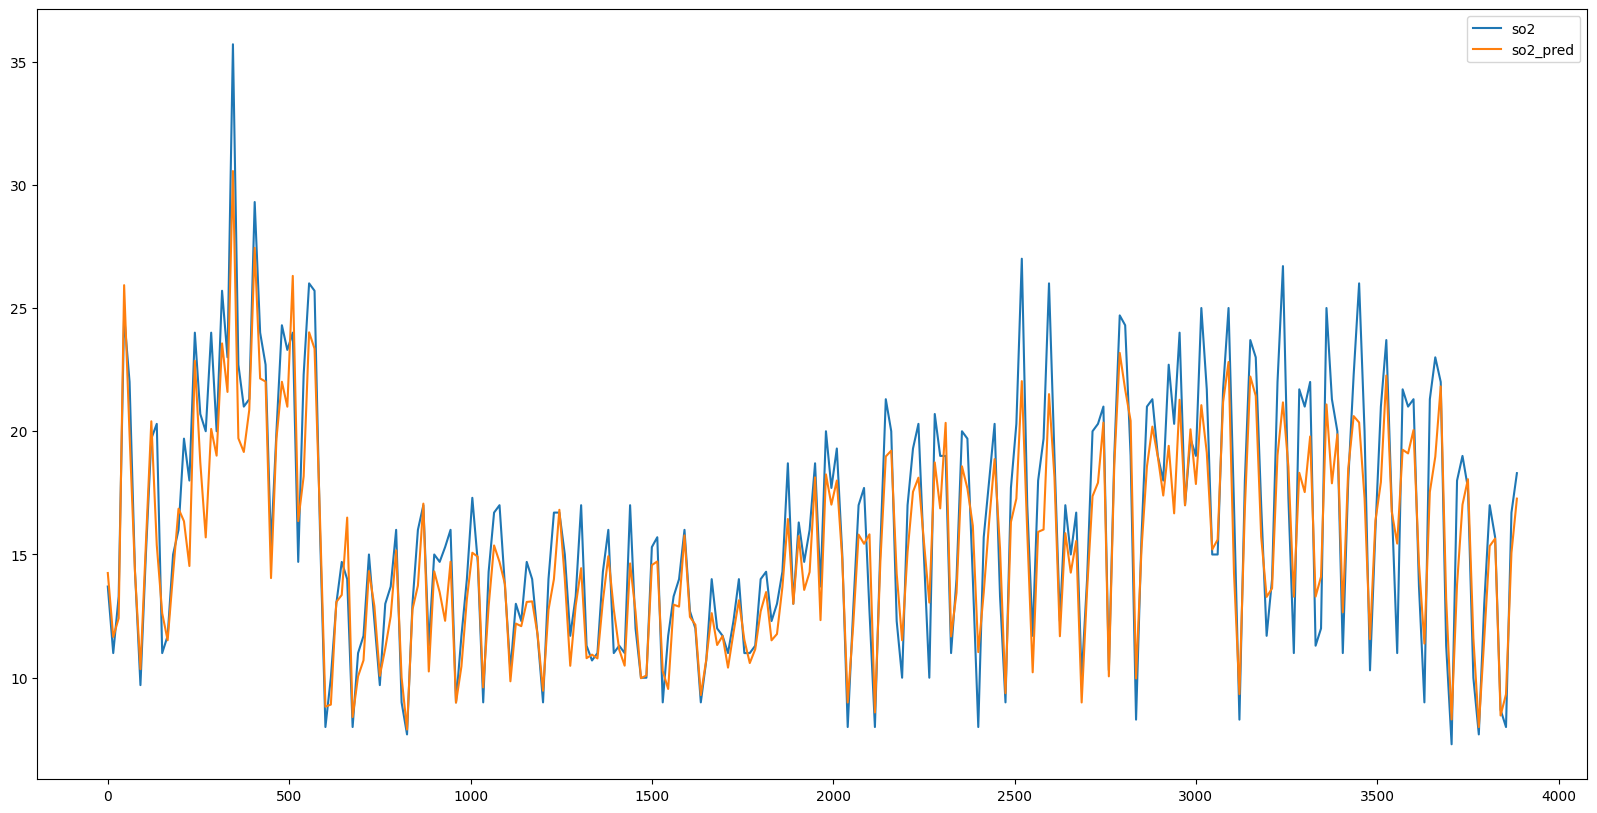

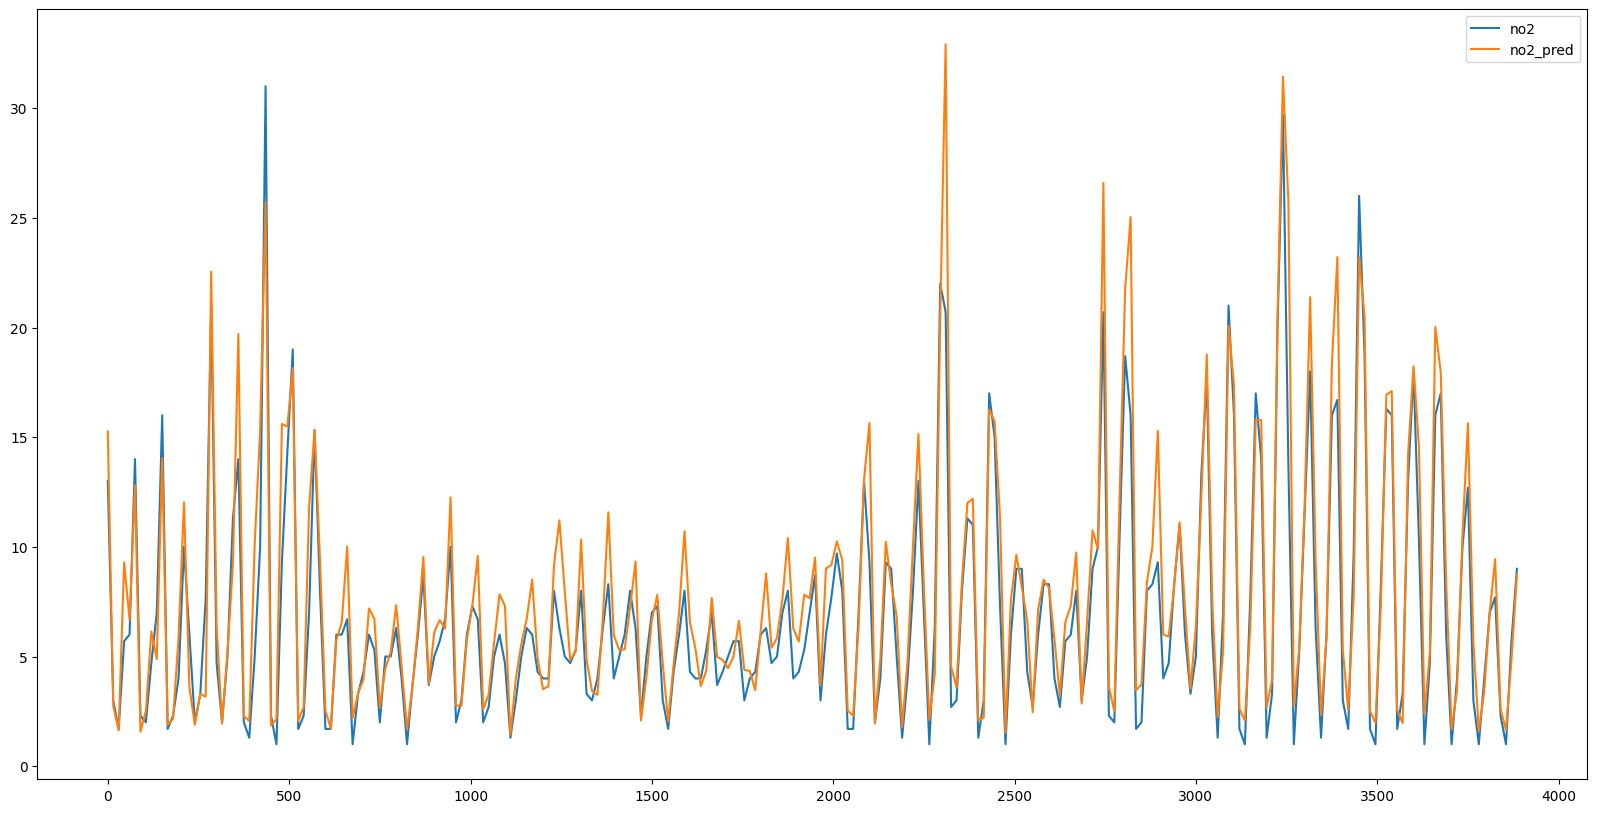

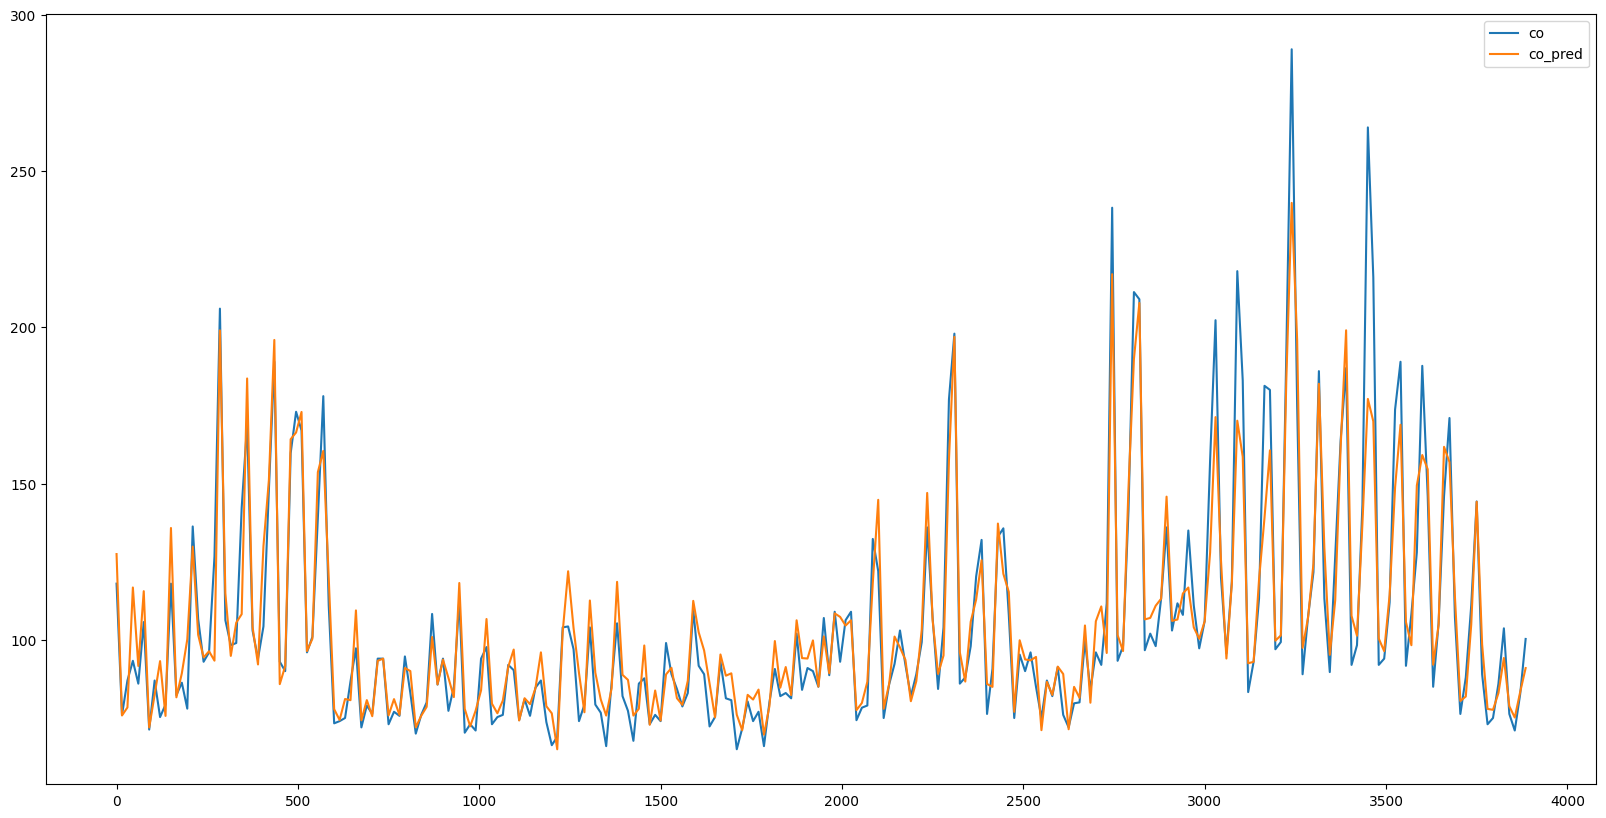

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_compare[['aqi', 'aqi_pred']][::15].plot()
df_compare[['pm10', 'pm10_pred']][::15].plot()
df_compare[['pm25', 'pm25_pred']][::15].plot()
df_compare[['o3', 'o3_pred']][::15].plot()
df_compare[['so2', 'so2_pred']][::15].plot()
df_compare[['no2', 'no2_pred']][::15].plot()
df_compare[['co', 'co_pred']][::15].plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, explained_variance_score, max_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

indicator = ["aqi",'pm10', 'pm25', 'o3', 'so2', 'no2', 'co']
for i in indicator:
    rmse = mean_squared_error(df_compare[f'{i}'], df_compare[f'{i}_pred'], squared=False)
    mse = mean_squared_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])
    mae = mean_absolute_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])
    mape = mean_absolute_percentage_error(df_compare[f'{i}'], df_compare[f'{i}_pred'])


    print(f'{i} ----> RMSE: {rmse} ; MSE: {mse} ; MAE: {mae} ; MAPE: {mape}  \n')



aqi ----> RMSE: 22.896009967849242 ; MSE: 524.2272724478519 ; MAE: 18.018259637640337 ; MAPE: 0.39069723414552965  

pm10 ----> RMSE: 4.926791503043132 ; MSE: 24.273274514458002 ; MAE: 3.3157362415712064 ; MAPE: 0.21372601973439534  

pm25 ----> RMSE: 5.591840206811721 ; MSE: 31.26867689851615 ; MAE: 3.7425305523058023 ; MAPE: 0.26893919615484724  

o3 ----> RMSE: 10.877732751621998 ; MSE: 118.32506981570991 ; MAE: 7.859820576116381 ; MAPE: 0.17523034841115423  

so2 ----> RMSE: 3.1720553816454187 ; MSE: 10.061935344225661 ; MAE: 2.219528460796969 ; MAPE: 0.13340949956090845  

no2 ----> RMSE: 3.5651991533822143 ; MSE: 12.710645003277259 ; MAE: 2.2257166216402884 ; MAPE: 0.426794556265857  

co ----> RMSE: 22.131239876028918 ; MSE: 489.7917784503324 ; MAE: 12.7265272395601 ; MAPE: 0.10922392507099914  

